In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(style='ticks', rc={"axes.facecolor": "none", "legend.frameon": True})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
import matplotlib.dates as mdates

In [3]:
import wget

In [4]:
# get csv file from Robert Koch Institute data
url = 'https://raw.githubusercontent.com/robert-koch-institut/SARS-CoV-2-Nowcasting_und_-R-Schaetzung/main/Nowcast_R_aktuell.csv'
filename = wget.download(url)

r = pd.read_csv(filename, sep=',', header=0)

100% [..............................................................................] 63801 / 63801

In [5]:
# get csv file of incidence from RKI data
url = 'https://raw.githubusercontent.com/robert-koch-institut/COVID-19_7-Tage-Inzidenz_in_Deutschland/main/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv'
ff = wget.download(url)

i = pd.read_csv(ff, sep=',', header=0)

100% [............................................................................] 383521 / 383521

In [6]:
# get csv file of hospitalizations from RKI data
url = 'https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Hospitalisierungen_in_Deutschland/master/Aktuell_Deutschland_adjustierte-COVID-19-Hospitalisierungen.csv'
hh = wget.download(url)

h = pd.read_csv(hh, sep=',', header=0)

100% [..........................................................................] 1047805 / 1047805

In [7]:
# get csv file of hospitalizations from covid-19-data github repo
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv'
cc = wget.download(url)

c = pd.read_csv(cc, sep=',', header=0)

100% [........................................................................] 11629274 / 11629274

In [8]:
# get indices from covid-policy-tracker
url='https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_nat_latest.csv'
file = wget.download(url)

ind = pd.read_csv(file, sep=',', header=0)

100% [........................................................................] 48640465 / 48640465

In [9]:
ind_g = ind[ind.CountryName == 'Germany']

In [10]:
# StringencyIndex_Average
ind_g.fillna(0, inplace=True)

/home/burgaya/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
ind_g

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
48283,Germany,DEU,0.0,0.0,NAT_TOTAL,20200101,0.0,0.0,0.0,0.0,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
48284,Germany,DEU,0.0,0.0,NAT_TOTAL,20200102,0.0,0.0,0.0,0.0,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
48285,Germany,DEU,0.0,0.0,NAT_TOTAL,20200103,0.0,0.0,0.0,0.0,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
48286,Germany,DEU,0.0,0.0,NAT_TOTAL,20200104,0.0,0.0,0.0,0.0,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
48287,Germany,DEU,0.0,0.0,NAT_TOTAL,20200105,0.0,0.0,0.0,0.0,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49374,Germany,DEU,0.0,0.0,NAT_TOTAL,20221227,0.0,0.0,0.0,0.0,...,V,76.23,14.81,14.81,48.96,48.96,41.67,41.67,100.0,100.0
49375,Germany,DEU,0.0,0.0,NAT_TOTAL,20221228,0.0,0.0,0.0,0.0,...,V,76.23,14.81,14.81,48.96,48.96,41.67,41.67,100.0,100.0
49376,Germany,DEU,0.0,0.0,NAT_TOTAL,20221229,0.0,0.0,0.0,0.0,...,V,76.23,14.81,14.81,48.96,48.96,41.67,41.67,100.0,100.0
49377,Germany,DEU,0.0,0.0,NAT_TOTAL,20221230,0.0,0.0,0.0,0.0,...,V,76.23,14.81,14.81,48.96,48.96,41.67,41.67,100.0,100.0


In [12]:
ind_g['Date'] = pd.to_datetime(ind_g['Date'], format='%Y%m%d')

/tmp/ipykernel_89652/4024843482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_g['Date'] = pd.to_datetime(ind_g['Date'], format='%Y%m%d')


In [13]:
c.fillna(0, inplace=True)

In [14]:
c_g = c[c.entity == 'Germany']

In [15]:
r.fillna(0, inplace=True)

In [16]:
r

,Datum,PS_COVID_Faelle,UG_PI_COVID_Faelle,OG_PI_COVID_Faelle,PS_COVID_Faelle_ma4,UG_PI_COVID_Faelle_ma4,OG_PI_COVID_Faelle_ma4,PS_7_Tage_R_Wert,UG_PI_7_Tage_R_Wert,OG_PI_7_Tage_R_Wert
0,2020-03-02,303,292,318,225,213,238,0.00,0.00,0.00
1,2020-03-03,321,304,336,261,248,275,0.00,0.00,0.00
2,2020-03-04,449,430,469,326,311,342,0.00,0.00,0.00
3,2020-03-05,503,483,524,394,377,412,0.00,0.00,0.00
4,2020-03-06,757,735,782,507,488,528,2.34,2.28,2.39
...,...,...,...,...,...,...,...,...,...,...
1099,2023-03-06,7516,6640,8326,6157,5671,6627,0.65,0.63,0.67
1100,2023-03-07,7198,6391,8129,6606,5978,7223,0.70,0.67,0.72
1101,2023-03-08,6102,5300,6994,6738,5993,7504,0.77,0.74,0.80
1102,2023-03-09,4990,4040,5917,6452,5593,7342,0.86,0.82,0.91


Text(0, 0.5, 'Predicted Ro')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


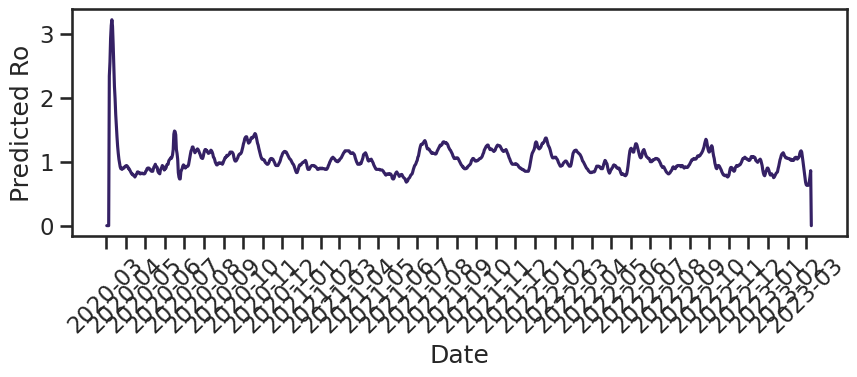

In [17]:
start_date='2020-03-01'
end_date='2023-03-03'

r['Datum'] = pd.to_datetime(r['Datum'])

# Set figure size and dpi
plt.figure(figsize=(10, 3), dpi=100)

# Create smoothed line plot
plt.plot(r['Datum'], r['PS_7_Tage_R_Wert'], color='#1f0954', alpha=0.9)

# Set xticks to show months with format %Y-%m and rotate 45 degrees
plt.xticks(pd.date_range(start_date, end_date, freq='MS'), 
           [month.strftime("%Y-%m") for month in pd.date_range(start_date, end_date, freq='MS')], 
           rotation=45)

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Predicted Ro')

Text(0, 0.5, 'New cases estimation')

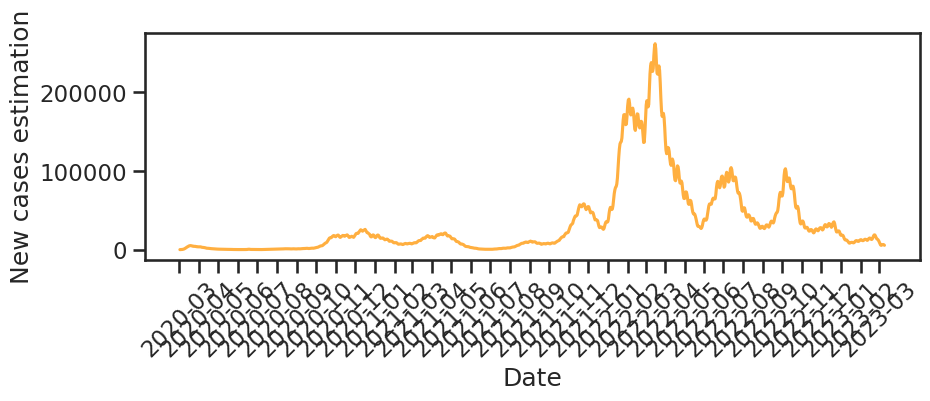

In [18]:
start_date='2020-03-01'
end_date='2023-03-03'

r['Datum'] = pd.to_datetime(r['Datum'])

# Set figure size and dpi
plt.figure(figsize=(10, 3), dpi=100)

# Create smoothed line plot
plt.plot(r['Datum'], r['PS_COVID_Faelle_ma4'], color='#ffa62b', alpha=0.9)

# Set xticks to show months with format %Y-%m and rotate 45 degrees
plt.xticks(pd.date_range(start_date, end_date, freq='MS'), 
           [month.strftime("%Y-%m") for month in pd.date_range(start_date, end_date, freq='MS')], 
           rotation=45)

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('New cases estimation')

In [19]:
i.fillna(0, inplace=True)

In [20]:
i.head(20)

,Meldedatum,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
0,2020-01-03,00-04,3975333,0,0,0,0.0
1,2020-01-03,00+,83237124,1,1,0,0.0
2,2020-01-03,05-14,7631602,0,0,0,0.0
3,2020-01-03,15-34,18795840,0,0,0,0.0
4,2020-01-03,35-59,28403806,0,0,0,0.0
5,2020-01-03,60-79,18318888,0,0,0,0.0
6,2020-01-03,80+,6111655,1,1,0,0.0
7,2020-01-04,00-04,3975333,0,0,0,0.0
8,2020-01-04,00+,83237124,1,0,0,0.0
9,2020-01-04,05-14,7631602,0,0,0,0.0


In [21]:
i_all = i[i.Altersgruppe == '00+']

In [22]:
i_all

,Meldedatum,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
1,2020-01-03,00+,83237124,1,1,0,0.0
8,2020-01-04,00+,83237124,1,0,0,0.0
15,2020-01-05,00+,83237124,1,0,0,0.0
22,2020-01-06,00+,83237124,1,0,0,0.0
29,2020-01-07,00+,83237124,1,0,0,0.0
...,...,...,...,...,...,...,...
8135,2023-03-10,00+,83237124,38251765,7319,44425,53.4
8142,2023-03-11,00+,83237124,38258115,6350,43410,52.2
8149,2023-03-12,00+,83237124,38259199,1084,43379,52.1
8156,2023-03-13,00+,83237124,38259762,563,43265,52.0


In [23]:
h.fillna(0, inplace=True)

In [24]:
h_all = h[h.Bundesland == 'Bundesgebiet']

In [25]:
h_all

,Datum,Bundesland,Bundesland_Id,Altersgruppe,fixierte_7T_Hospitalisierung_Faelle,aktualisierte_7T_Hospitalisierung_Faelle,PS_adjustierte_7T_Hospitalisierung_Faelle,UG_PI_adjustierte_7T_Hospitalisierung_Faelle,OG_PI_adjustierte_7T_Hospitalisierung_Faelle,Bevoelkerung,fixierte_7T_Hospitalisierung_Inzidenz,aktualisierte_7T_Hospitalisierung_Inzidenz,PS_adjustierte_7T_Hospitalisierung_Inzidenz,UG_PI_adjustierte_7T_Hospitalisierung_Inzidenz,OG_PI_adjustierte_7T_Hospitalisierung_Inzidenz
0,2023-03-14,Bundesgebiet,0,00+,5791,5791,0.0,0.0,0.0,83155031,6.96,6.96,0.00,0.00,0.00
1,2023-03-13,Bundesgebiet,0,00+,5823,6846,0.0,0.0,0.0,83155031,7.00,8.23,0.00,0.00,0.00
2,2023-03-12,Bundesgebiet,0,00+,6048,6964,0.0,0.0,0.0,83155031,7.27,8.37,0.00,0.00,0.00
3,2023-03-11,Bundesgebiet,0,00+,6251,7031,9046.0,8472.0,11542.0,83155031,7.52,8.46,10.88,10.19,13.88
4,2023-03-10,Bundesgebiet,0,00+,5976,7198,8477.0,8359.0,8632.0,83155031,7.19,8.66,10.19,10.05,10.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2021-03-13,Bundesgebiet,0,00+,2467,4732,4732.0,4732.0,4732.0,83155031,2.97,5.69,5.69,5.69,5.69
732,2021-03-12,Bundesgebiet,0,00+,2365,4635,4635.0,4635.0,4635.0,83155031,2.84,5.57,5.57,5.57,5.57
733,2021-03-11,Bundesgebiet,0,00+,2353,4462,4462.0,4462.0,4462.0,83155031,2.83,5.37,5.37,5.37,5.37
734,2021-03-10,Bundesgebiet,0,00+,2310,4425,4425.0,4425.0,4425.0,83155031,2.78,5.32,5.32,5.32,5.32


In [26]:
c_g['indicator'].unique()

array(['Weekly new hospital admissions',
       'Weekly new hospital admissions per million',
       'Daily ICU occupancy', 'Daily ICU occupancy per million',
       'Weekly new ICU admissions',
       'Weekly new ICU admissions per million'], dtype=object)

In [27]:
# get the weekly new hospital admissions per milion
c_ger = c_g[c_g.indicator == 'Weekly new hospital admissions per million']
c_icu = c_g[c_g.indicator == 'Daily ICU occupancy per million']

In [28]:
c_icu

,entity,iso_code,date,indicator,value
73667,Germany,DEU,2020-03-20,Daily ICU occupancy per million,2.399
73671,Germany,DEU,2020-03-21,Daily ICU occupancy per million,3.694
73675,Germany,DEU,2020-03-22,Daily ICU occupancy per million,4.366
73679,Germany,DEU,2020-03-23,Daily ICU occupancy per million,5.410
73683,Germany,DEU,2020-03-24,Daily ICU occupancy per million,7.389
...,...,...,...,...,...
79167,Germany,DEU,2023-03-09,Daily ICU occupancy per million,13.386
79173,Germany,DEU,2023-03-10,Daily ICU occupancy per million,13.386
79179,Germany,DEU,2023-03-11,Daily ICU occupancy per million,13.170
79185,Germany,DEU,2023-03-12,Daily ICU occupancy per million,13.482


In [29]:
c_ger

,entity,iso_code,date,indicator,value
73629,Germany,DEU,2020-03-01,Weekly new hospital admissions per million,0.288
73631,Germany,DEU,2020-03-02,Weekly new hospital admissions per million,0.348
73633,Germany,DEU,2020-03-03,Weekly new hospital admissions per million,0.564
73635,Germany,DEU,2020-03-04,Weekly new hospital admissions per million,0.780
73637,Germany,DEU,2020-03-05,Weekly new hospital admissions per million,0.936
...,...,...,...,...,...
79177,Germany,DEU,2023-03-10,Weekly new hospital admissions per million,86.338
79183,Germany,DEU,2023-03-11,Weekly new hospital admissions per million,84.335
79189,Germany,DEU,2023-03-12,Weekly new hospital admissions per million,83.531
79193,Germany,DEU,2023-03-13,Weekly new hospital admissions per million,82.116


In [30]:
start_date='2020-03-01'
end_date='2023-03-07'

i_all['Meldedatum'] = pd.to_datetime(i_all['Meldedatum'])
h_all['Datum'] = pd.to_datetime(h_all['Datum'])
c_ger['date'] = pd.to_datetime(c_ger['date'])
c_icu['date'] = pd.to_datetime(c_icu['date'])

/tmp/ipykernel_89652/4145253077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_all['Meldedatum'] = pd.to_datetime(i_all['Meldedatum'])
/tmp/ipykernel_89652/4145253077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_all['Datum'] = pd.to_datetime(h_all['Datum'])
/tmp/ipykernel_89652/4145253077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [31]:
i_all['Faelle_neu'].max()

307817

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


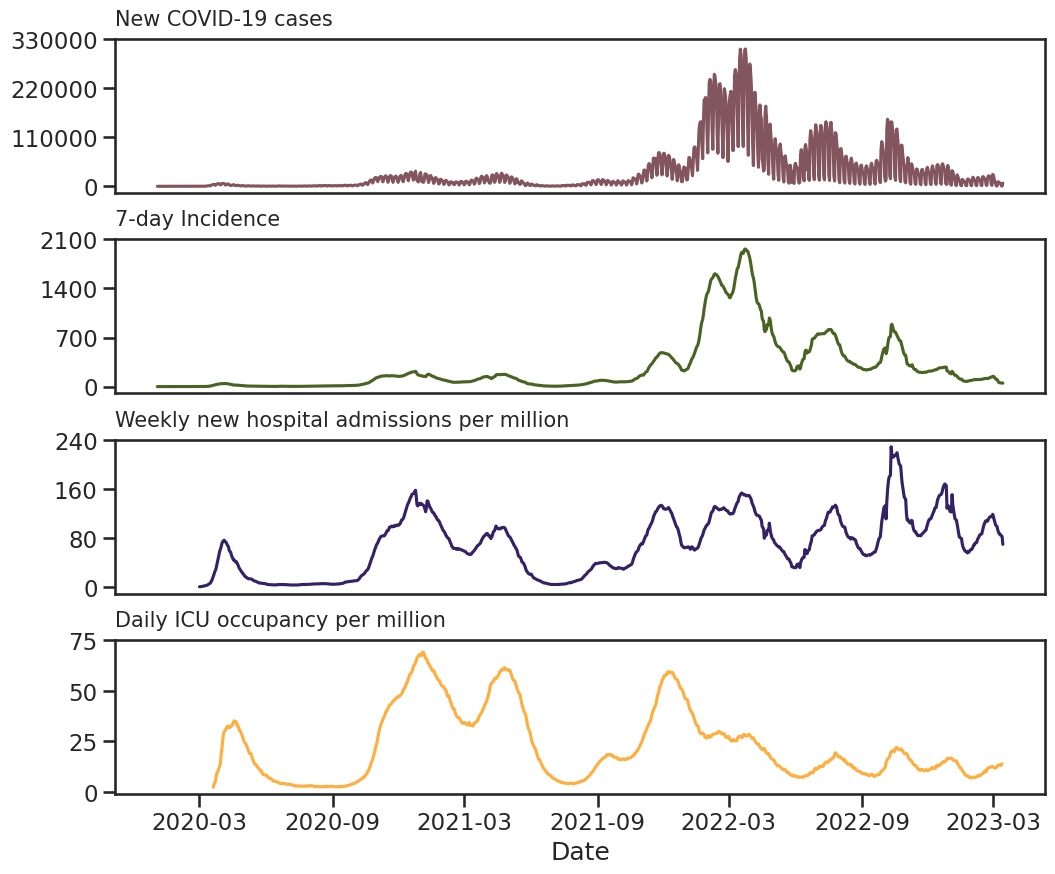

In [32]:
# Set figure size and dpi
fig, axs = plt.subplots(4, 1, figsize=(12, 10), dpi=100, sharex=True)

# 1
axs[0].plot(i_all['Meldedatum'], i_all['Faelle_neu'], color='#76424e', alpha=0.9)
axs[0].set_title('New COVID-19 cases', fontsize=15, loc='left', pad=10)
axs[0].set_yticks(np.arange(0, 350000, 110000))

# 2
axs[1].plot(i_all['Meldedatum'], i_all['Inzidenz_7-Tage'], color='#35530a', alpha=0.9)
axs[1].set_title('7-day Incidence', fontsize=15, loc='left', pad=10)
axs[1].set_yticks(np.arange(0, 2200, 700))

# 3
axs[2].plot(c_ger['date'], c_ger['value'], color='#1f0954', alpha=0.9)
axs[2].set_title('Weekly new hospital admissions per million', fontsize=15, loc='left', pad=10)
axs[2].set_yticks(np.arange(0, 250, 80))

# 4
axs[3].plot(c_icu['date'], c_icu['value'], color='#ffa62b', alpha=0.9)
axs[3].set_title('Daily ICU occupancy per million', fontsize=15, loc='left', pad=10)
axs[3].set_yticks(np.arange(0, 80, 25))

plt.subplots_adjust(hspace=0.3)

# Set xticks to show months with format %Y-%m and rotate 45 degrees
xticks = pd.date_range(start_date, end_date, freq='6MS')
xticklabels = [month.strftime("%Y-%m") for month in xticks]
plt.xticks(xticks, xticklabels, rotation=45)

# Remove x-ticks and tick labels from the first three subplots
for i in range(3):
    axs[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set x-ticks and tick labels for the fourth subplot
axs[3].set_xticks(xticks)
axs[3].set_xticklabels(xticklabels, rotation=0, ha='center')

# Set axis labels and title
plt.xlabel('Date')

plt.savefig('figures/combined_NPIs.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('figures/combined_NPIs.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

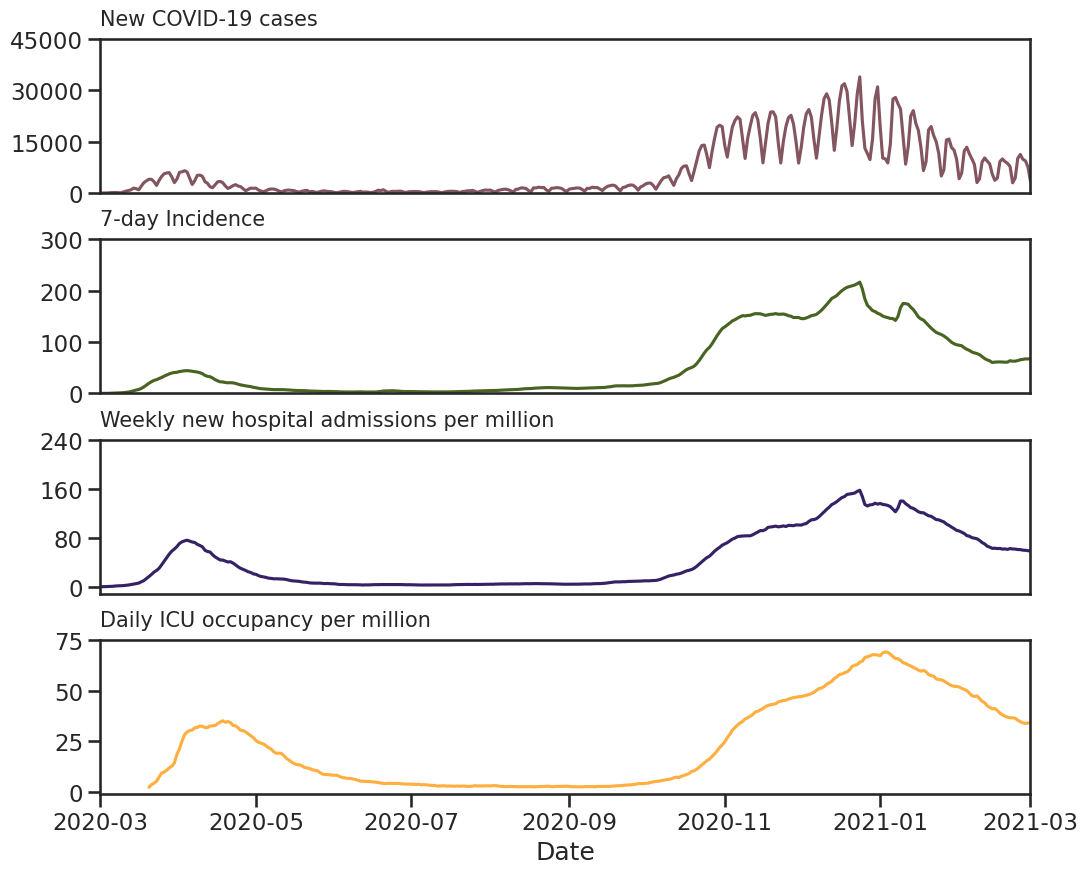

In [33]:
# start end date zoomed
start_date_zoom='2020-03-01'
end_date_zoom='2021-03-01'

# Convert start and end dates to datetime objects
start_date_zoom = pd.to_datetime(start_date_zoom)
end_date_zoom = pd.to_datetime(end_date_zoom)


# Set figure size and dpi
fig, axs = plt.subplots(4, 1, figsize=(12, 10), dpi=100, sharex=True)

# 1
axs[0].plot(i_all['Meldedatum'], i_all['Faelle_neu'], color='#76424e', alpha=0.9)
axs[0].set_title('New COVID-19 cases', fontsize=15, loc='left', pad=10)
axs[0].set_yticks(np.arange(0, 47000, 15000))
axs[0].set_xlim(start_date_zoom, end_date_zoom)
axs[0].set_ylim(0, 45000)

# 2
axs[1].plot(i_all['Meldedatum'], i_all['Inzidenz_7-Tage'], color='#35530a', alpha=0.9)
axs[1].set_title('7-day Incidence', fontsize=15, loc='left', pad=10)
axs[1].set_yticks(np.arange(0, 330, 100))
axs[1].set_xlim(start_date_zoom, end_date_zoom)
axs[1].set_ylim(0, 300)

# 3
axs[2].plot(c_ger['date'], c_ger['value'], color='#1f0954', alpha=0.9)
axs[2].set_title('Weekly new hospital admissions per million', fontsize=15, loc='left', pad=10)
axs[2].set_yticks(np.arange(0, 250, 80))
axs[2].set_xlim(start_date_zoom, end_date_zoom)

# 4
axs[3].plot(c_icu['date'], c_icu['value'], color='#ffa62b', alpha=0.9)
axs[3].set_title('Daily ICU occupancy per million', fontsize=15, loc='left', pad=10)
axs[3].set_yticks(np.arange(0, 80, 25))
axs[3].set_xlim(start_date_zoom, end_date_zoom)

plt.subplots_adjust(hspace=0.3)

# Set xticks to show months with format %Y-%m and rotate 45 degrees
xticks = pd.date_range(start_date_zoom, end_date_zoom, freq='2MS')
xticklabels = [month.strftime("%Y-%m") for month in xticks]
plt.xticks(xticks, xticklabels, rotation=45)

# Remove x-ticks and tick labels from the first three subplots
for i in range(3):
    axs[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set x-ticks and tick labels for the fourth subplot
axs[3].set_xticks(xticks)
axs[3].set_xticklabels(xticklabels, rotation=0, ha='center')

# Set axis labels and title
plt.xlabel('Date')

plt.savefig('figures/combined_NPIs_zoomed.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('figures/combined_NPIs_zoomed.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

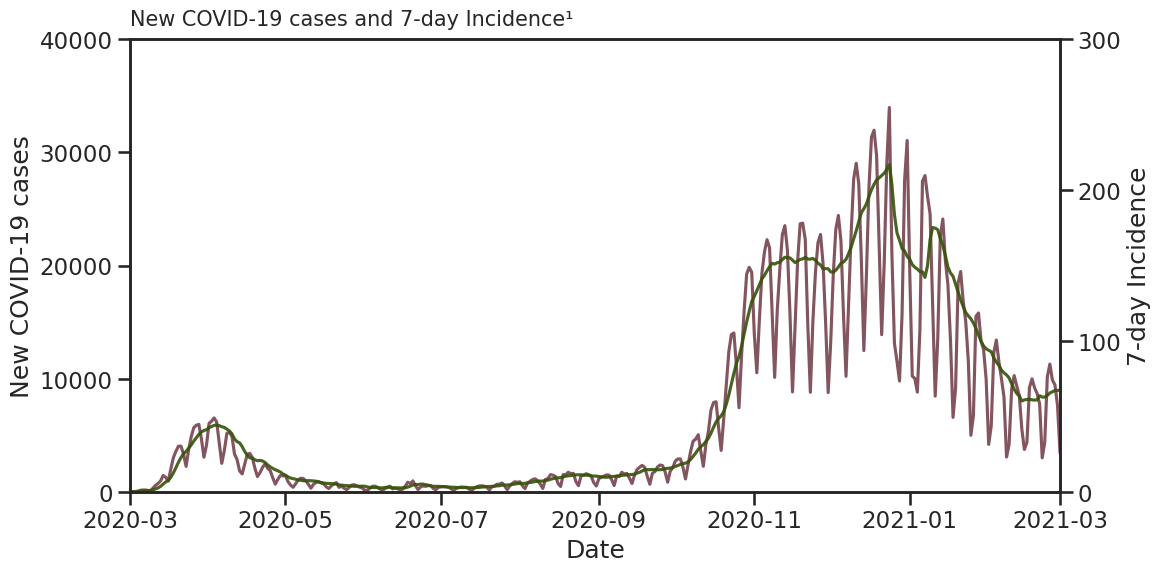

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=100, sharex=True)

# plot the first data on ax1
ax1.plot(i_all['Meldedatum'], i_all['Faelle_neu'], color='#76424e', alpha=0.9)
ax1.set_title('New COVID-19 cases and 7-day Incidence¹', fontsize=15, loc='left', pad=10)
ax1.set_ylabel('New COVID-19 cases')
ax1.set_yticks(np.arange(0, 42000, 10000))
ax1.set_xlim(start_date_zoom, end_date_zoom)
ax1.set_ylim(0, 40000)

# add a second y-axis on the right-hand side
ax2 = ax1.twinx()

# plot the second data on ax2
ax2.plot(i_all['Meldedatum'], i_all['Inzidenz_7-Tage'], color='#35530a', alpha=0.9)
ax2.set_ylabel('7-day Incidence')
ax2.set_yticks(np.arange(0, 330, 100))
ax2.set_ylim(0, 300)

# add xlabel
ax1.set_xlabel('Date')

plt.savefig('figures/1-2_wave.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('figures/1-2_wave.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

### NPIs index and GPS derived contact index 

Text(0, 0.5, 'Predicted Ro')

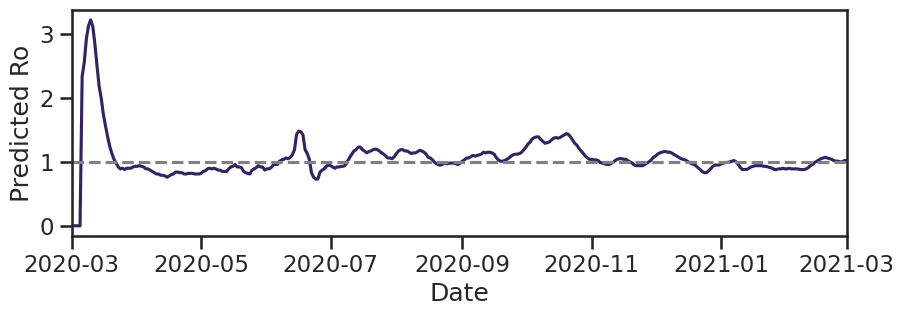

In [35]:
# Ro
start_date='2020-03-01'
end_date='2021-03-01'

# Convert start and end dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)


r['Datum'] = pd.to_datetime(r['Datum'])

# Set figure size and dpi
plt.figure(figsize=(10, 3), dpi=100)

# Create smoothed line plot
plt.plot(r['Datum'], r['PS_7_Tage_R_Wert'], color='#1f0954', alpha=0.9)

# Set xticks to show months with format %Y-%m and rotate 45 degrees
xticks = pd.date_range(start_date, end_date, freq='2MS')
xticklabels = [month.strftime("%Y-%m") for month in xticks]
plt.xticks(xticks, xticklabels)
plt.xlim(start_date, end_date)

# add an horizontal line to y=1
plt.axhline(y=1, linestyle='--', color='gray')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Predicted Ro')

/tmp/ipykernel_89652/3276849975.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_g['Date'] = pd.to_datetime(ind_g['Date'])


Text(2020-11-15 00:00:00, 0.9, '2nd wave')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


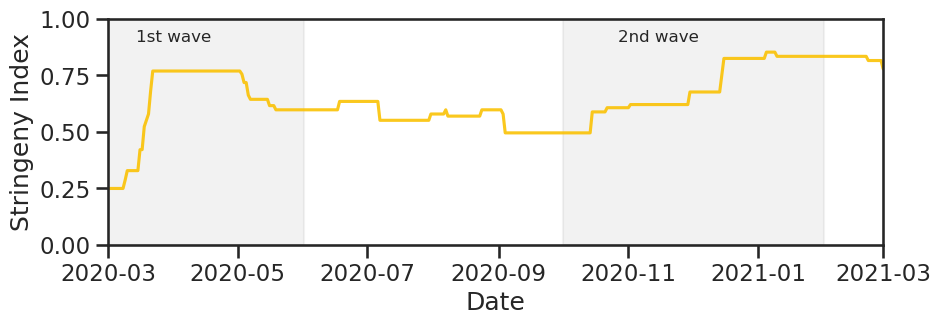

In [36]:
# StringencyIndex_Average
ind_g

start_date='2020-03-01'
end_date='2021-03-01'

# Convert start and end dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ind_g['Date'] = pd.to_datetime(ind_g['Date'])

# Set figure size and dpi
plt.figure(figsize=(10, 3), dpi=100)

# Create smoothed line plot
plt.plot(ind_g['Date'], ind_g['StringencyIndex_Average']/100, color='#fac205', alpha=0.9)

# Set xticks to show months with format %Y-%m and rotate 45 degrees
xticks = pd.date_range(start_date, end_date, freq='2MS')
xticklabels = [month.strftime("%Y-%m") for month in xticks]
plt.xticks(xticks, xticklabels)
plt.xlim(start_date, end_date)
plt.yticks()
plt.ylim(0, 1)

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Stringeny Index')

# Add grey almost transparent square
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
plt.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')

# add text
plt.text(pd.Timestamp('2020-04-01'), 0.9, '1st wave', fontsize=12, ha='center')
plt.text(pd.Timestamp('2020-11-15'), 0.9, '2nd wave', fontsize=12, ha='center')

In [37]:
# add facebook mobility range data

In [38]:
f = pd.read_csv('./2020_movement_change.csv', sep='\t')
s = pd.read_csv('./2021-2023_movement_change.csv', sep='\t')

In [39]:
df = [f, s]
m = pd.concat(df)

# fix bugs in dataframe
m.replace({'Baden-W-rttemberg': 'Baden-Württemberg',
          'Th-ringen': 'Thüringen'}, inplace=True)

m.reset_index(inplace=True)

m['date'] = pd.to_datetime(m['date'])

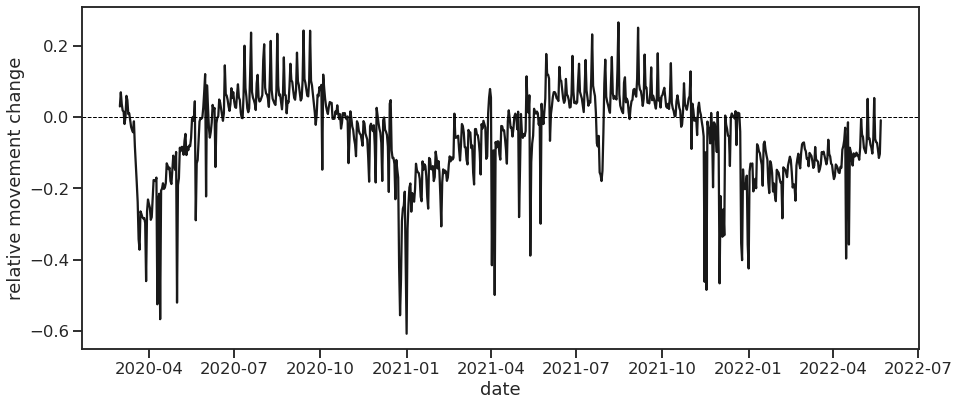

In [40]:
# calculate mean relative movement change for each date
mean_rel_movement = m.groupby('date')['relative movement change'].mean().reset_index()

# create a line plot of the mean relative movement change by date
fig, ax = plt.subplots(figsize=(15, 6.3))

sns.lineplot(x='date', y='relative movement change', data=mean_rel_movement, color='black', alpha=0.9)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

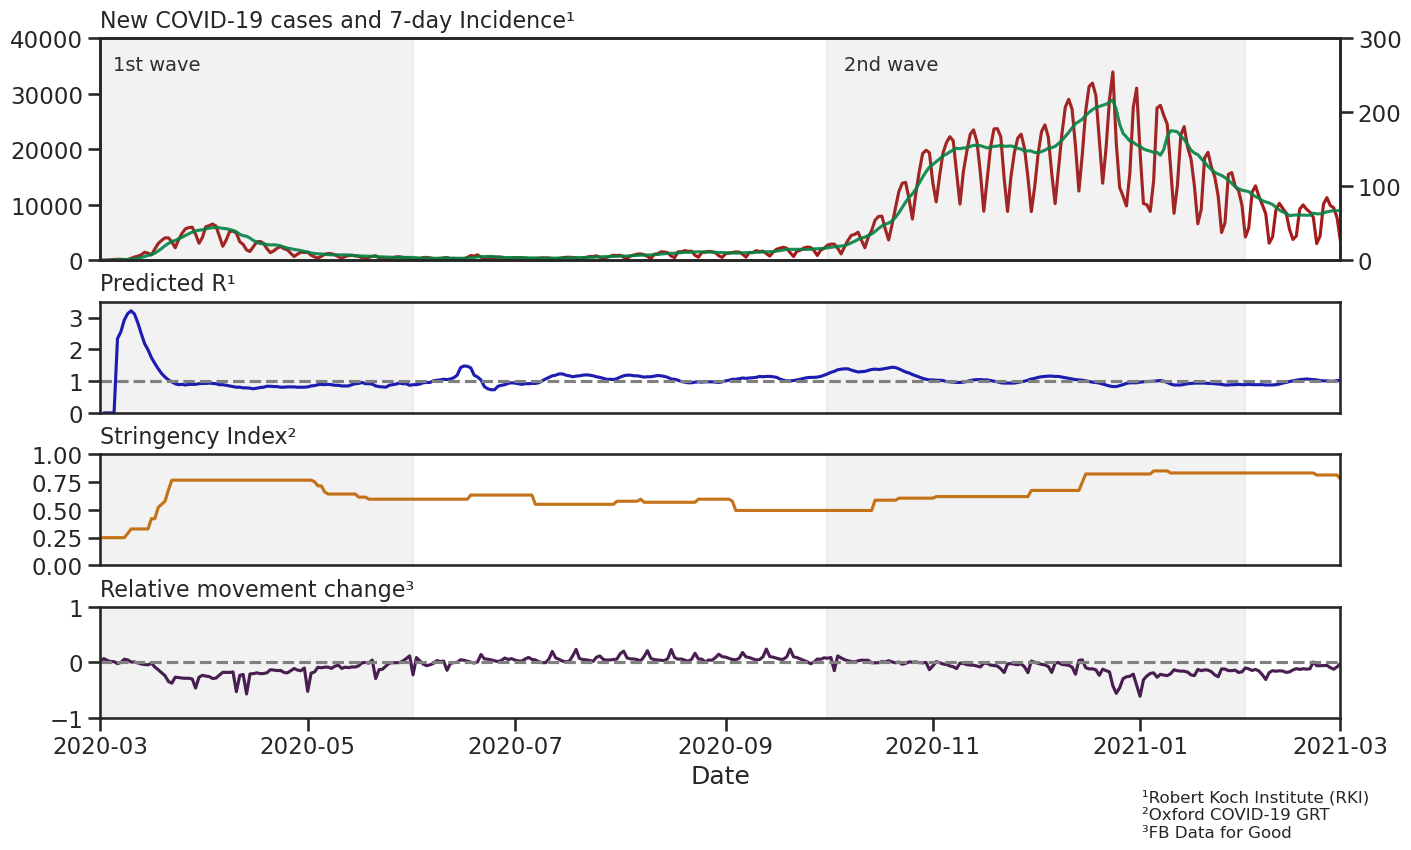

In [60]:
# Create a figure with two subplots
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 9), dpi=100, sharex=True)
fig = plt.figure(figsize=(12, 9), dpi=100)
gs = fig.add_gridspec(nrows=4, ncols=1, height_ratios=[2, 1, 1, 1])

# create the axes using the gridspec object
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# plot the first data on ax1
ax1.plot(i_all['Meldedatum'], i_all['Faelle_neu'], color='#9a0200', alpha=0.9)
#ax1.set_ylabel('New COVID-19 cases')
ax1.set_yticks(np.arange(0, 42000, 10000))
ax1.set_xlim(start_date_zoom, end_date_zoom)
ax1.set_ylim(0, 40000)
ax1.set_title('New COVID-19 cases and 7-day Incidence¹', fontsize=16, loc='left', pad=8)
# add text 1st and snd wave
w1 = "1st wave"
ax1.text(0.01, 5.8, w1, fontsize=14, ha='left', va='bottom', transform=ax4.transAxes)
w2 = "2nd wave"
ax1.text(0.6, 5.8, w2, fontsize=14, ha='left', va='bottom', transform=ax4.transAxes)

# add a second y-axis on the right-hand side
ax1_2 = ax1.twinx()
ax1_2.plot(i_all['Meldedatum'], i_all['Inzidenz_7-Tage'], color='#048243', alpha=0.9)
ax1_2.set_ylim(0, 300)
ax1_2.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax1_2.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')
#ax1_2.axvspan(pd.Timestamp('2020-03-16'), pd.Timestamp('2020-03-16'), alpha=0.7, color='black')
#ax1_2.axvspan(pd.Timestamp('2020-11-02'), pd.Timestamp('2020-11-02'), alpha=0.7, color='black')

#FIRST-LOCKDOWN: 2020-03-16
#SECOND-LOCKDOWN: 2020-11-02

# add legend 
#ax1_2.legend(['7-day Incidence'], bbox_to_anchor=(0.7, 1))

# plot the second data on ax2
ax2.plot(r['Datum'], r['PS_7_Tage_R_Wert'], color='#0504aa', alpha=0.9)
#ax2.set_ylabel('Predicted Ro')
ax2.set_xlim(start_date_zoom, end_date_zoom)
ax2.set_ylim(0, 3.5)
ax2.set_yticks([0, 1, 2, 3])
ax2.set_title('Predicted R¹', fontsize=16, loc='left', pad=8)
ax2.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax2.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')
#ax2.axvspan(pd.Timestamp('2020-03-16'), pd.Timestamp('2020-03-16'), alpha=0.7, color='black')
#ax2.axvspan(pd.Timestamp('2020-11-02'), pd.Timestamp('2020-11-02'), alpha=0.7, color='black')

# add an horizontal line to y=1
ax2.axhline(y=1, linestyle='--', color='grey')

# plot third data on ax3
ax3.plot(ind_g['Date'], ind_g['StringencyIndex_Average']/100, color='#be6400', alpha=0.9)
#ax3.set_ylabel('Stringency Index')
ax3.set_xlim(start_date_zoom, end_date_zoom)
ax3.set_ylim(0, 1)
ax3.set_yticks([0, 0.25, 0.50, 0.75, 1])
ax3.set_title('Stringency Index²', fontsize=16, loc='left', pad=8)
ax3.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax3.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')
#ax3.axvspan(pd.Timestamp('2020-03-16'), pd.Timestamp('2020-03-16'), alpha=0.7, color='black')
#ax3.axvspan(pd.Timestamp('2020-11-02'), pd.Timestamp('2020-11-02'), alpha=0.7, color='black')


# plot 4 data on ax4
ax4.plot(mean_rel_movement['date'], mean_rel_movement['relative movement change'], color='#35063e', alpha=0.9)
#ax3.set_ylabel('Stringency Index')
ax4.set_xlim(start_date_zoom, end_date_zoom)
ax4.set_ylim(-1, 1)
#ax4.set_yticks([0, 0.25, 0.50, 0.75, 1])
ax4.set_title('Relative movement change³', fontsize=16, loc='left', pad=8)
ax4.axhline(y=0, linestyle='--', color='grey')
ax4.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax4.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')
#ax4.axvspan(pd.Timestamp('2020-03-16'), pd.Timestamp('2020-03-16'), alpha=0.7, color='black')
#ax4.axvspan(pd.Timestamp('2020-11-02'), pd.Timestamp('2020-11-02'), alpha=0.7, color='black')


# Remove x-ticks and tick labels from the first subplot
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# add xlabel
ax4.set_xlabel('Date')

# Set xticks to show months with format %Y-%m and rotate 45 degrees
xticks = pd.date_range(start_date, end_date, freq='2MS')
xticklabels = [month.strftime("%Y-%m") for month in xticks]
ax4.set_xticks(xticks)
ax4.set_xticklabels(xticklabels)

plt.subplots_adjust(hspace=0.3)

# add reference from data sources
ref = "¹Robert Koch Institute (RKI)\n"
ref += "²Oxford COVID-19 GRT\n"
ref += "³FB Data for Good"
ax4.text(0.84, -1.1, ref, fontsize=12, ha='left', va='bottom', transform=ax4.transAxes)

plt.savefig('figures/1-2_wave_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('figures/1-2_wave_all.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

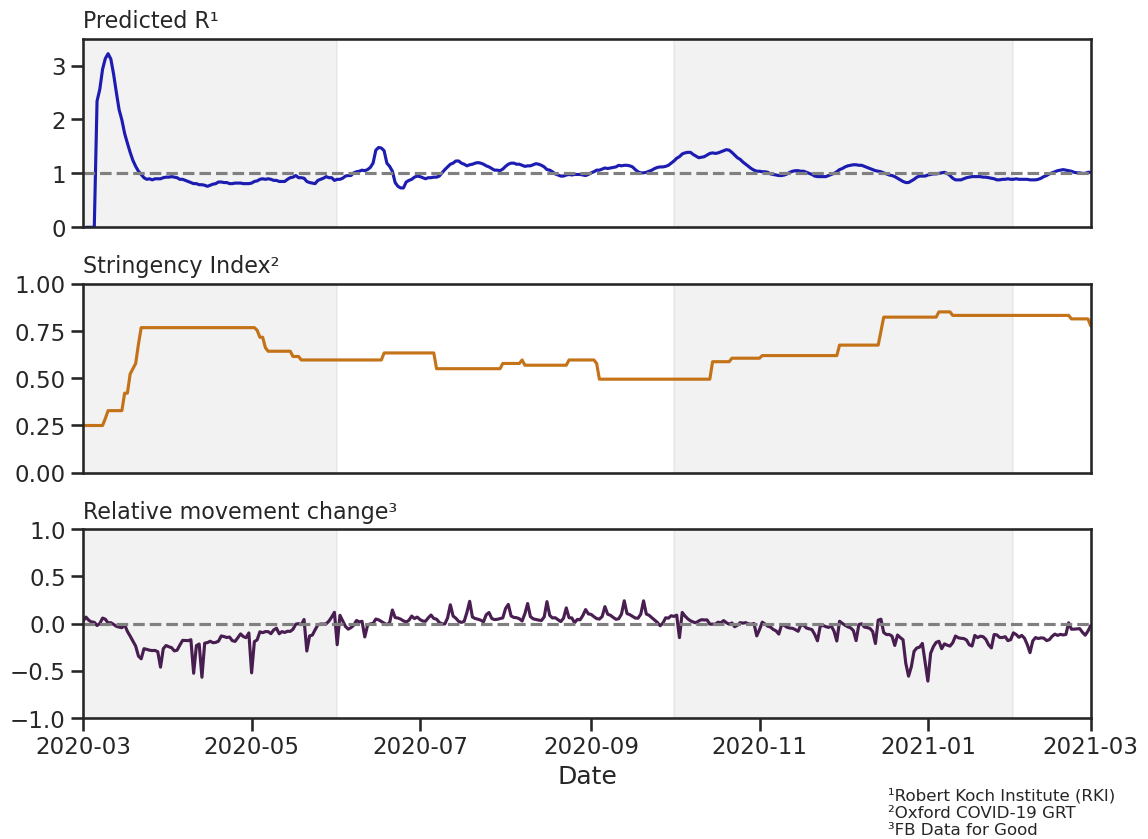

In [47]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 9), dpi=100, sharex=True)

#FIRST-LOCKDOWN: 2020-03-16
#SECOND-LOCKDOWN: 2020-11-02

# plot the R data on ax1
ax1.plot(r['Datum'], r['PS_7_Tage_R_Wert'], color='#0504aa', alpha=0.9)
#ax2.set_ylabel('Predicted Ro')
ax1.set_xlim(start_date_zoom, end_date_zoom)
ax1.set_ylim(0, 3.5)
ax1.set_yticks([0, 1, 2, 3])
ax1.set_title('Predicted R¹', fontsize=16, loc='left', pad=8)
ax1.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax1.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')

# add an horizontal line to y=1
ax1.axhline(y=1, linestyle='--', color='grey')

# plot stringenx index data on ax2
ax2.plot(ind_g['Date'], ind_g['StringencyIndex_Average']/100, color='#be6400', alpha=0.9)
#ax3.set_ylabel('Stringency Index')
ax2.set_xlim(start_date_zoom, end_date_zoom)
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 0.25, 0.50, 0.75, 1])
ax2.set_title('Stringency Index²', fontsize=16, loc='left', pad=8)
ax2.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax2.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')

# plot mobility data on ax3
ax3.plot(mean_rel_movement['date'], mean_rel_movement['relative movement change'], color='#35063e', alpha=0.9)
ax3.set_xlim(start_date_zoom, end_date_zoom)
ax3.set_ylim(-1, 1)
ax3.set_title('Relative movement change³', fontsize=16, loc='left', pad=8)
ax3.axhline(y=0, linestyle='--', color='grey')
ax3.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-01'), alpha=0.1, color='grey')
ax3.axvspan(pd.Timestamp('2020-10-01'), pd.Timestamp('2021-02-01'), alpha=0.1, color='grey')

# Remove x-ticks and tick labels from the first subplot
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# add xlabel
ax3.set_xlabel('Date')

# Set xticks to show months with format %Y-%m and rotate 45 degrees
xticks = pd.date_range(start_date, end_date, freq='2MS')
xticklabels = [month.strftime("%Y-%m") for month in xticks]
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)

plt.subplots_adjust(hspace=0.3)

# add reference from data sources
ref = "¹Robert Koch Institute (RKI)\n"
ref += "²Oxford COVID-19 GRT\n"
ref += "³FB Data for Good"
ax3.text(0.72, -0.8, ref, fontsize=12, ha='left', va='bottom', transform=ax4.transAxes)

plt.savefig('figures/R_mobility.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('figures/R_mobility.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

(array([18293., 18322., 18353., 18383., 18414., 18444., 18475., 18506.,
        18536., 18567., 18597., 18628., 18659., 18687., 18718., 18748.,
        18779., 18809., 18840., 18871., 18901., 18932., 18962., 18993.,
        19024., 19052., 19083., 19113., 19144., 19174.]),
 [Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12'),
  Text(18628.0, 0, '2021-01'),
  Text(18659.0, 0, '2021-02'),
  Text(18687.0, 0, '2021-03'),
  Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07'),
  Text(18840.0, 0, '2021-08'),
  Text(18871.0, 0, '2021-09'),
  Text(18901.0, 0, '2021-10'),
  Text(18932.0, 0, '2021-11'),
  Text(18962.0, 0, '2021-12'),
  Text(18993.

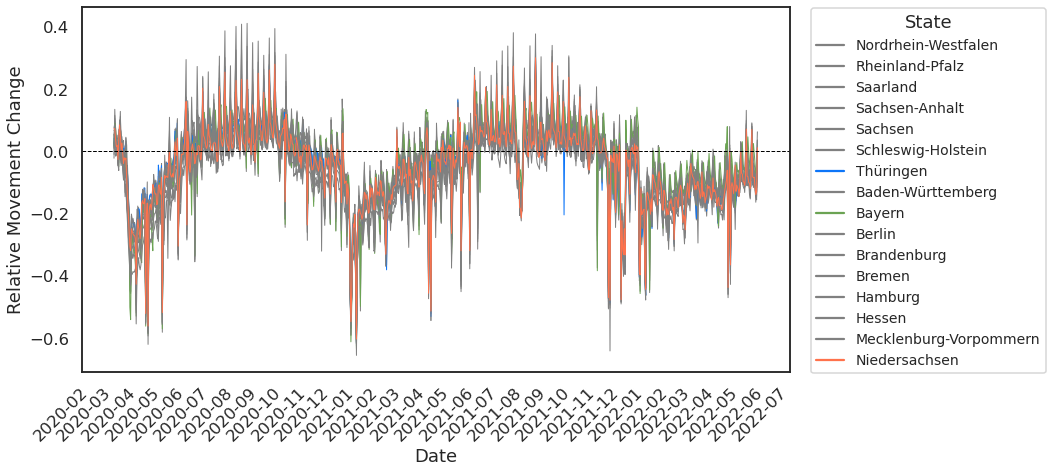

In [62]:
# Define color palette
state_colors = {'Niedersachsen': '#ff724c', 'Bayern': '#6ba353', 'Baden-Württemberg': 'grey', 'Berlin': 'grey', 
                'Brandenburg': 'grey', 'Bremen': 'grey', 'Hamburg': 'grey', 'Hessen': 'grey', 'Mecklenburg-Vorpommern': 'grey', 
                'Nordrhein-Westfalen': 'grey', 'Rheinland-Pfalz': 'grey', 'Saarland': 'grey', 'Sachsen': 'grey', 
                'Sachsen-Anhalt': 'grey', 'Schleswig-Holstein': 'grey', 'Thüringen': '#0d75f8'}

# Create a line plot of the movement change by date
fig, ax1 = plt.subplots(figsize=(15, 6.3))
sns.set_style("white")

sns.lineplot(x='date', y='relative movement change', hue='state', data=m, palette=state_colors, linewidth=1)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)

# add labels
#ax1.set_title('Relative Movement Change by Date and State')
ax1.set_xlabel('Date')
ax1.set_ylabel('Relative Movement Change')

# add legend
ax1.legend(title='State', bbox_to_anchor=(1.02, 1.015), loc='upper left', fontsize=14)

# add dates as in 
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.xticks(rotation=45, ha='right')